# Regression with Categorical Data

This notebook will use the diamonds dataset to go over how to perform regression when working with categorical data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Diamonds Dataset
#### Source : https://www.kaggle.com/shivam2503/diamonds
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [2]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

### Taking fraction of data
Only taking 20% data of actual data

In [4]:
data = data.sample(frac=0.2)

In [5]:
data.shape

(10788, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 4514 to 39199
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   price    10788 non-null  int64  
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 927.1+ KB


### Checking NULL values

In [7]:
data.reset_index(inplace=True, drop=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.02,Good,F,SI2,64.2,61.0,3633,6.30,6.21,4.02
1,0.73,Ideal,G,VS1,60.2,56.0,3273,5.86,5.90,3.54
2,0.72,Premium,F,VS1,62.2,57.0,3167,5.74,5.67,3.55
3,1.28,Ideal,H,I1,61.9,56.0,3355,6.95,6.91,4.29
4,0.51,Premium,F,VS2,62.1,58.0,1687,5.12,5.09,3.17


### Finding correlations between features 

In [8]:
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.030652,0.186730,0.924414,0.976090,0.950255,0.972255
depth,0.030652,1.000000,-0.304681,-0.006112,-0.022617,-0.025150,0.100944
table,0.186730,-0.304681,1.000000,0.134963,0.199064,0.186099,0.156793
price,0.924414,-0.006112,0.134963,1.000000,0.888451,0.867497,0.881178
x,0.976090,-0.022617,0.199064,0.888451,1.000000,0.973434,0.988553
y,0.950255,-0.025150,0.186099,0.867497,0.973434,1.000000,0.969125
z,0.972255,0.100944,0.156793,0.881178,0.988553,0.969125,1.000000


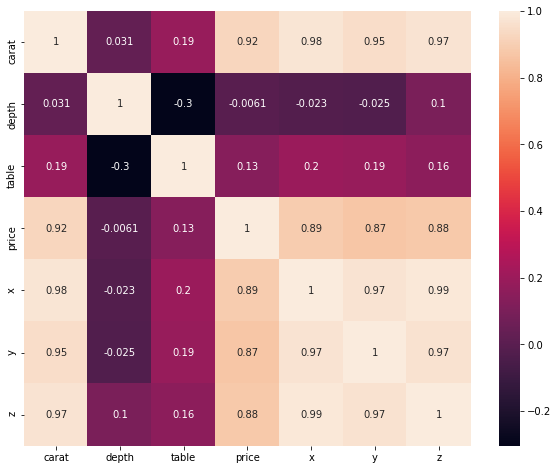

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

### Find unique values

In [10]:
data['cut'].unique()

array(['Good', 'Ideal', 'Premium', 'Very Good', 'Fair'], dtype=object)

In [11]:
data['color'].unique()

array(['F', 'G', 'H', 'E', 'I', 'D', 'J'], dtype=object)

In [12]:
data['clarity'].unique()

array(['SI2', 'VS1', 'I1', 'VS2', 'SI1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)

### Count values and plot the graph

In [13]:
data['cut'].value_counts()

Ideal        4275
Premium      2742
Very Good    2478
Good          965
Fair          328
Name: cut, dtype: int64

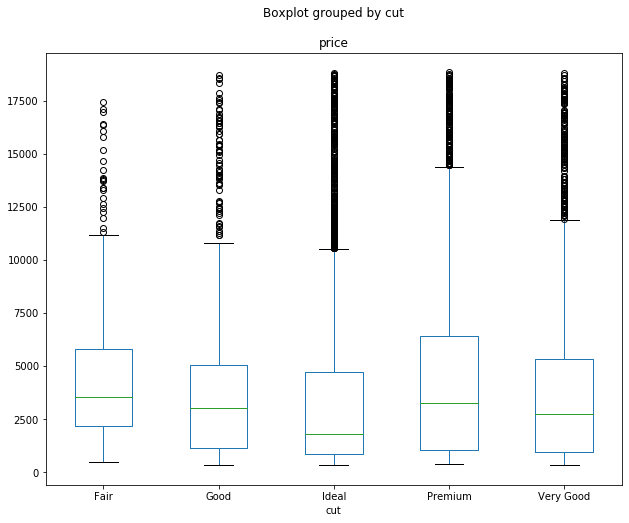

In [14]:
data.boxplot(by ='cut', column =['price'], grid = False, figsize=(10, 8)) 

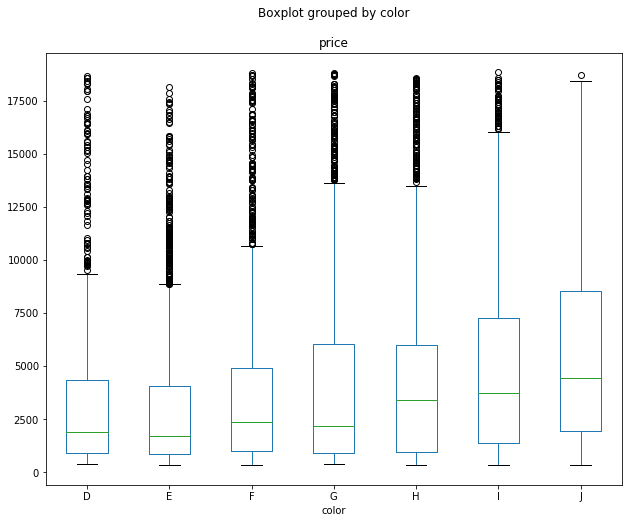

In [15]:
data.boxplot(by ='color', column =['price'], grid = False, figsize=(10, 8)) 

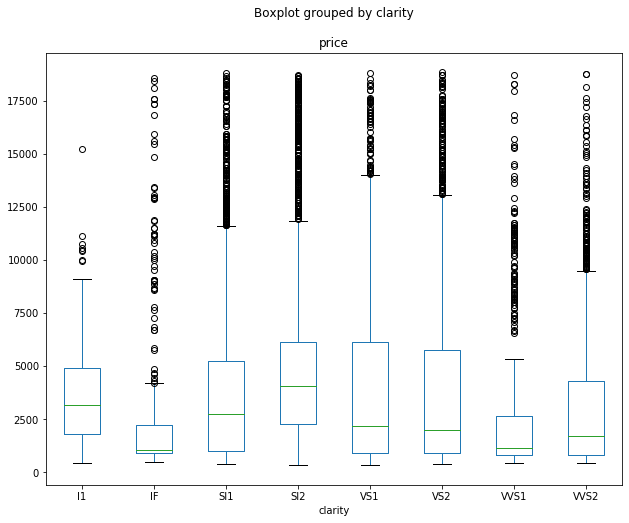

In [16]:
data.boxplot(by ='clarity', column =['price'], grid = False, figsize=(10, 8)) 

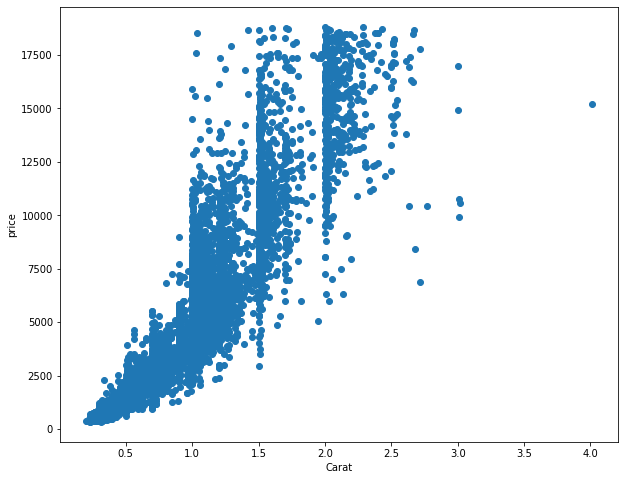

In [17]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['carat'], data['price'])

plt.xlabel("Carat")
plt.ylabel("price")

plt.show()

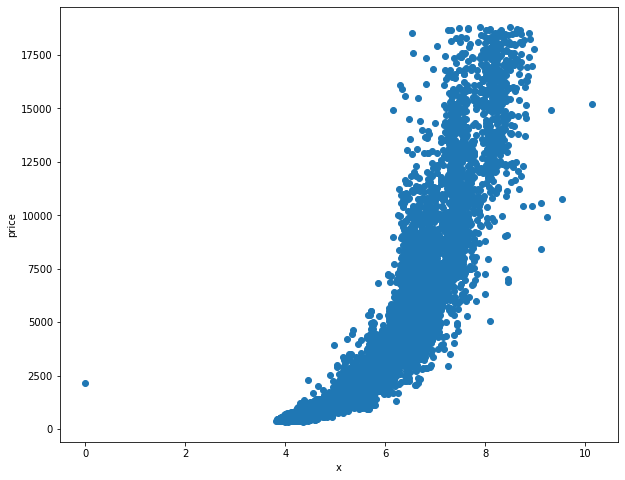

In [18]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['x'], data['price'])

plt.xlabel("x")
plt.ylabel("price")

plt.show()

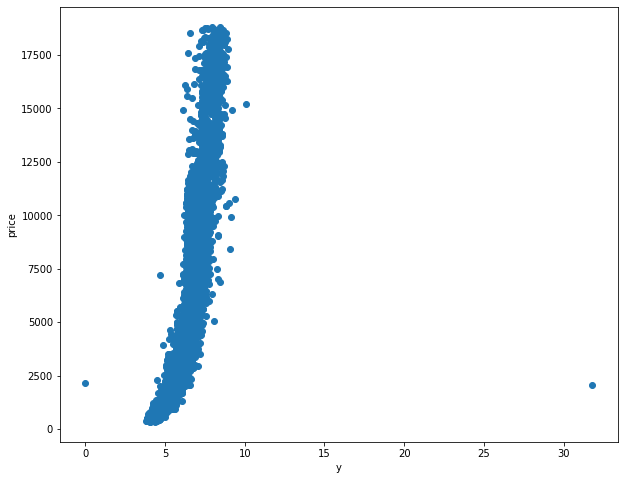

In [19]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['y'], data['price'])

plt.xlabel("y")
plt.ylabel("price")

plt.show()

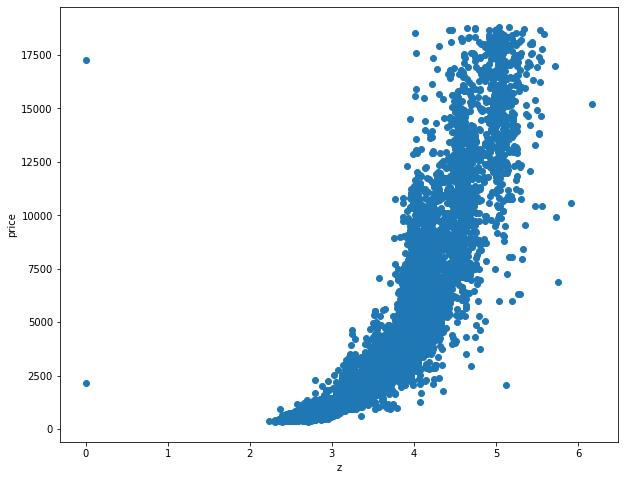

In [20]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['z'], data['price'])

plt.xlabel("z")
plt.ylabel("price")

plt.show()

### Converting categorical into numerical
using label encoder and one hot encoder

In [21]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" :  2, "SI2" : 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.02,Good,F,1,64.2,61.0,3633,6.30,6.21,4.02
1,0.73,Ideal,G,4,60.2,56.0,3273,5.86,5.90,3.54
2,0.72,Premium,F,4,62.2,57.0,3167,5.74,5.67,3.55
3,1.28,Ideal,H,0,61.9,56.0,3355,6.95,6.91,4.29
4,0.51,Premium,F,3,62.1,58.0,1687,5.12,5.09,3.17


In [22]:
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.02,1,64.2,61.0,3633,6.30,6.21,4.02,0,1,0,0,0,0,0,1,0,0,0,0
1,0.73,4,60.2,56.0,3273,5.86,5.90,3.54,0,0,1,0,0,0,0,0,1,0,0,0
2,0.72,4,62.2,57.0,3167,5.74,5.67,3.55,0,0,0,1,0,0,0,1,0,0,0,0
3,1.28,0,61.9,56.0,3355,6.95,6.91,4.29,0,0,1,0,0,0,0,0,0,1,0,0
4,0.51,3,62.1,58.0,1687,5.12,5.09,3.17,0,0,0,1,0,0,0,1,0,0,0,0


In [23]:
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.803058,61.750037,57.463126,5.741232,5.745402,3.545277
std,0.480793,1.447636,2.264462,1.128810,1.148454,0.698371
min,0.200000,50.800000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.730000,2.910000
50%,0.710000,61.800000,57.000000,5.700000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.010000,73.600000,95.000000,10.140000,31.800000,6.170000


In [24]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

array([[ 4.51238171e-01,  1.69246746e+00,  1.56197757e+00,
         4.95029168e-01,  4.04560510e-01,  6.79789307e-01],
       [-1.51960316e-01, -1.07078654e+00, -6.46155144e-01,
         1.05220152e-01,  1.34619962e-01, -7.55673944e-03],
       [-1.72760264e-01,  3.10840461e-01, -2.04528600e-01,
        -1.09139823e-03, -6.56585093e-02,  6.76296987e-03],
       [ 9.92036815e-01,  1.03596411e-01, -6.46155144e-01,
         1.07088340e+00,  1.01410368e+00,  1.06642146e+00],
       [-6.09559168e-01,  2.41759111e-01,  2.37097944e-01,
        -5.50367740e-01, -5.70708568e-01, -5.37385984e-01]])

In [25]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,-3.596184e-16,-3.766366e-15,-4.002875e-15,-1.558717e-16,-1.159312e-16,4.975215e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.254358e+00,-7.564433e+00,-3.295914e+00,-5.086327e+00,-5.002958e+00,-5.076734e+00
25%,-8.383586e-01,-4.490544e-01,-6.461551e-01,-9.047396e-01,-8.841879e-01,-9.096984e-01
50%,-1.935602e-01,3.451506e-02,-2.045286e-01,-3.652858e-02,-2.211971e-02,-2.187645e-02
75%,4.928381e-01,5.180845e-01,6.787245e-01,7.076523e-01,6.919166e-01,7.084287e-01
max,6.670423e+00,8.186114e+00,1.657728e+01,3.896999e+00,2.268772e+01,3.758527e+00


In [26]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.02,1,64.2,61.0,3633,6.30,6.21,4.02,0,1,0,0,0,0,0,1,0,0,0,0
1,0.73,4,60.2,56.0,3273,5.86,5.90,3.54,0,0,1,0,0,0,0,0,1,0,0,0
2,0.72,4,62.2,57.0,3167,5.74,5.67,3.55,0,0,0,1,0,0,0,1,0,0,0,0
3,1.28,0,61.9,56.0,3355,6.95,6.91,4.29,0,0,1,0,0,0,0,0,0,1,0,0
4,0.51,3,62.1,58.0,1687,5.12,5.09,3.17,0,0,0,1,0,0,0,1,0,0,0,0


In [27]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,3633,0,1,0,0,0,0,0,1,0,0,0,0
1,4,3273,0,0,1,0,0,0,0,0,1,0,0,0
2,4,3167,0,0,0,1,0,0,0,1,0,0,0,0
3,0,3355,0,0,1,0,0,0,0,0,0,1,0,0
4,3,1687,0,0,0,1,0,0,0,1,0,0,0,0


In [28]:
numeric_df.head()

,carat,depth,table,x,y,z
0,0.451238,1.692467,1.561978,0.495029,0.404561,0.679789
1,-0.151960,-1.070787,-0.646155,0.105220,0.134620,-0.007557
2,-0.172760,0.310840,-0.204529,-0.001091,-0.065659,0.006763
3,0.992037,0.103596,-0.646155,1.070883,1.014104,1.066421
4,-0.609559,0.241759,0.237098,-0.550368,-0.570709,-0.537386


In [29]:
data.shape, numeric_df.shape

((10788, 14), (10788, 6))

In [30]:
data = pd.concat([data, numeric_df], axis=1)

data.shape

(10788, 20)

In [31]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,1,3633,0,1,0,0,0,0,0,1,0,0,0,0,0.451238,1.692467,1.561978,0.495029,0.404561,0.679789
1,4,3273,0,0,1,0,0,0,0,0,1,0,0,0,-0.151960,-1.070787,-0.646155,0.105220,0.134620,-0.007557
2,4,3167,0,0,0,1,0,0,0,1,0,0,0,0,-0.172760,0.310840,-0.204529,-0.001091,-0.065659,0.006763
3,0,3355,0,0,1,0,0,0,0,0,0,1,0,0,0.992037,0.103596,-0.646155,1.070883,1.014104,1.066421
4,3,1687,0,0,0,1,0,0,0,1,0,0,0,0,-0.609559,0.241759,0.237098,-0.550368,-0.570709,-0.537386


In [32]:
data.to_csv('datasets/diamonds_processed.csv', index=False)

In [33]:
!ls datasets/

Mall_Customers.csv             diamonds.csv
_DS_Store                      diamonds_processed.csv
bbc-text.csv                   gender_voice_dataset.csv
boston_data.csv                german_credit_data_dataset.csv
cars.csv                       wine.csv


### Spilting into train and test data

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [35]:
x_train.shape, y_train.shape

((8630, 19), (8630,))

In [36]:
x_test.shape, y_test.shape

((2158, 19), (2158,))

### Linear regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [37]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_prediction = linear_regression.predict(x_test)

y_prediction

array([  404.0419129 ,  1453.334476  ,  4290.81679887, ...,
        -131.39539919, 15058.70841432,  2639.15045701])

### Find train and test score 

In [39]:
train_score = linear_regression.score(x_train, y_train)

print("Training score : ", train_score)

Training score :  0.9178130936896025


In [40]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_prediction)

print("Testing score : ", score)

Testing score :  0.9045347854858509
